In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, log_loss, mean_squared_error, r2_score
from model import SolNet, PlusSolNet, HIVNet, PlusHIVNet
from train import ModelCV

import matplotlib.pyplot as plt
%matplotlib inline

RDKit WARNING: [15:41:23] Enabling RDKit 2019.09.1 jupyter extensions


In [2]:
model = ModelCV(SolNet, folds=5, inner_hidden_size=150, feature_size=50, hidden_size=100)  # Initialize a model
model.load_model('models/SolNet/solnet_model')  # load from trained model file
data_test = pd.read_csv('datasets/esol_test.txt')  # load test dataset
smiles_test = data_test['smiles'].values
target_test = data_test['solubility'].values
target_pred = model.predict(smiles_test)

Text(0, 0.5, 'Predicted Solubility$\\log{(S/M)}$')

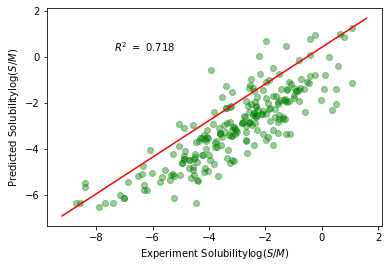

In [3]:
fig, ax = plt.subplots()
ax.scatter(target_test, target_pred, c='g', alpha=0.4)
ax.plot(ax.get_xlim(), ax.get_ylim(), '-r')
r2_result = r2_score(target_test, target_pred)
ax.text(0.8 * ax.get_xlim()[0] + 0.2 * ax.get_xlim()[1], 0.2 * ax.get_ylim()[0] + 0.8 * ax.get_ylim()[1],
        fr'$R^{{2}}\ =\ {r2_result:.3f}$')
ax.set_xlabel(r'Experiment Solubility' + r'$\log{(S/M)}$')
ax.set_ylabel(r'Predicted Solubility' + r'$\log{(S/M)}$')
# fig.savefig('solnet_eval.svg')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     577.8
Date:                Tue, 31 Dec 2019   Prob (F-statistic):           2.55e-64
Time:                        15:48:16   Log-Likelihood:                -294.28
No. Observations:                 229   AIC:                             592.6
Df Residuals:                     227   BIC:                             599.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8237      0.108     -7.612      0.0

Text(0, 0.5, 'Predicted Solubility$\\log{(S/M)}$')

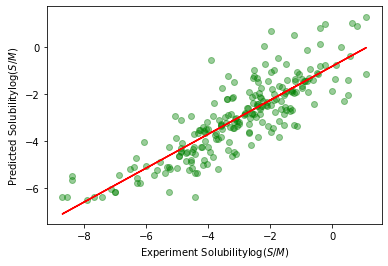

In [6]:
# 由上图可见估计有偏 通过线性回归描述这一偏差
import statsmodels.api as sm
linear_model = sm.OLS(target_pred.numpy(), sm.tools.add_constant(target_test)).fit()
print(linear_model.summary())

fig, ax = plt.subplots()
ax.scatter(target_test, target_pred, c='g', alpha=0.4)
ax.plot(target_test, linear_model.predict(sm.tools.add_constant(target_test)), '-r')
ax.set_xlabel(r'Experiment Solubility' + r'$\log{(S/M)}$')
ax.set_ylabel(r'Predicted Solubility' + r'$\log{(S/M)}$')
# fig.savefig('linear.svg')

In [ ]:
# fxxk, 居然有偏……